# **Assignment No. 5**

## Title:
An Image Recognition System to Classify Handwritten Digits (0–9) from the MNIST Dataset using Support Vector Machines (SVM)


## Objectives:

The main objectives of this assignment are as follows:

1. Data Preprocessing: Load the MNIST dataset and prepare it for modeling.

2. Model Application: Apply Support Vector Machine (SVM) models with different kernels (Polynomial and Linear).

3. Self-Learning Exploration: Extend the study by applying additional kernels (RBF and Sigmoid) to compare performance.

4. Performance Analysis: Evaluate model performance using key metrics such as Accuracy and Recall.

## Outcomes:

Upon successful completion of this assignment, the following will be demonstrated:

1. The workflow for a complete image classification task using SVM.

2. How SVM kernels affect the decision boundaries and model performance.

3. The ability to compare multiple kernels and identify the most suitable one for handwritten digit recognition.

4. The practical exploration of self-learning by extending beyond lab-taught methods.

# Support Vector Machines (SVM)
## 1. Introduction:

Support Vector Machines (SVM) is a supervised machine learning algorithm used for classification and regression problems. It works by finding a decision boundary that best separates different classes in the data.

## 2. Key Concepts:

Hyperplane:

1. A line (in 2D) or plane (in 3D) that separates different classes.

2. SVM chooses the hyperplane that best divides the classes with maximum distance from the nearest points.

Margin:

1. The distance between the hyperplane and the nearest data points from each class.

2. SVM tries to maximize the margin, which helps the model generalize better on new data.

Support Vectors:

1. The data points that are closest to the hyperplane.

2. They are crucial because they define the position of the hyperplane.

Kernels:

1. Kernels allow SVM to handle non-linear data by transforming it into higher dimensions.

2. Common kernels:

    *   Linear Kernel: For linearly separable data.
    *   Polynomial Kernel: For simple non-linear patterns.
    *   RBF (Radial Basis Function) Kernel: For complex non-linear patterns.
    *   Sigmoid Kernel: Functions similar to a neural network.


Regularization (C Parameter):

1. Controls the trade-off between maximizing the margin and minimizing classification errors.

## 3. Advantages of SVM:

1. Effective in high-dimensional spaces.

2. Works well for both linear and non-linear data.

3. Focuses on the most important data points (support vectors).

## 4. Limitations of SVM:

1. Slower for very large datasets.

2. Requires careful tuning of kernel type and parameters.

3. Less interpretable than simpler models like linear regression.

This script imports all the necessary tools for a machine learning project using SVM. It brings in numpy and pandas for handling and processing data, matplotlib for visualizing results, and several modules from scikit-learn (sklearn), including datasets, model selection, the SVM classifier (SVC), and evaluation metrics like accuracy, recall, and confusion matrix. These tools together allow you to load data, train an SVM model, make predictions, and evaluate its performance efficiently.

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

This part loads a dataset of handwritten digits, which is commonly used for testing image classification models. The dataset contains images of digits (0–9) along with their corresponding labels. It provides a structured way to train and evaluate machine learning models like SVM for classification tasks.

In [ ]:
# Load MNIST dataset
from sklearn.datasets import load_digits
data = load_digits()

This part separates the dataset into features (input data) and labels (target values). Features are the information the model uses to make predictions, while labels are the actual outcomes. It also checks the shape of the data and features, which helps understand the size and structure of the dataset before training a machine learning model.

In [ ]:
x = data.data
y = data.target

print("Shape of data:", x.shape)
print("Shape of labels:", y.shape)
print("Feature names:", data.feature_names if hasattr(data, 'feature_names') else "64 pixel features")

Shape of data: (1797, 64)
Shape of labels: (1797,)
Feature names: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


The dataset is divided into training and testing sets. The training set is used to teach the machine learning model, while the testing set is used to evaluate how well the model performs on new, unseen data. Checking the shapes of these sets helps ensure that the data has been split correctly and that the model will have enough data to learn and be tested effectively.

In [ ]:
#Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (1257, 64)
Testing set shape: (540, 64)


## SVC with Polynomial Kernel

Support Vector Classifier (SVC) is a type of Support Vector Machine used for classification tasks. It works by finding a decision boundary (hyperplane) that separates different classes of data. When the data is not linearly separable, polynomial kernels can be used to transform the data into a higher-dimensional space so that it becomes easier to separate. The degree of the polynomial controls the complexity of this transformation.


In this step, the SVM model is trained using a polynomial kernel. The model learns from the training data to classify the inputs. After training, it makes predictions on the test data, and the accuracy and recall metrics are calculated to evaluate how well the model classifies the data. These metrics give an indication of the model’s performance and ability to generalize to unseen data.

In [ ]:
# Polynomial kernel

poly = SVC(kernel='poly', degree=2)
poly.fit(x_train, y_train)

poly_y_pred = poly.predict(x_test)

poly_acc = accuracy_score(y_test, poly_y_pred)
poly_rec = recall_score(y_test, poly_y_pred, average='micro')


print("Polynomial kernel:")
print("Accuracy:", poly_acc)
print("Recall:", poly_rec)

Polynomial kernel:
Accuracy: 0.987037037037037
Recall: 0.987037037037037


The SVM model using a polynomial kernel was trained and tested on the dataset. This kernel maps the data into a higher-dimensional space, helping the model capture more complex relationships between features.

Results:

1. Accuracy: 98.70%

2. Recall: 98.70%

These results show that the polynomial kernel performs very well, correctly classifying most of the handwritten digit images.

## SVC with Linear Kernel

Support Vector Classifier (SVC) is a type of Support Vector Machine used for classification tasks. When the data is approximately linearly separable, a linear kernel is used to draw a straight decision boundary (hyperplane) that separates the classes efficiently. This kernel is simple, fast, and works well for datasets without complex non-linear patterns.

In this step, the SVM model is trained using a linear kernel. The model learns from the training data to classify the inputs. After training, it predicts the labels for the test set, and accuracy and recall metrics are calculated to evaluate the model’s performance and its ability to generalize to unseen data.

In [ ]:
# Linear kernel

linear = SVC(kernel='linear')
linear.fit(x_train, y_train)

lin_y_pred = linear.predict(x_test)

lin_acc = accuracy_score(y_test, lin_y_pred)
lin_rec = recall_score(y_test, lin_y_pred, average='micro')


print("Linear kernel:")
print("Accuracy:", lin_acc)
print("Recall:", lin_rec)

Linear kernel:
Accuracy: 0.9796296296296296
Recall: 0.9796296296296296


The SVM model using a linear kernel was trained and tested on the dataset. It separates classes using a straight hyperplane, which is effective for data that is approximately linearly separable.

Results:

1. Accuracy: 97.96%

2. Recall: 97.96%

These results indicate that the linear kernel performs very well, correctly classifying most of the data.

## Conclusion
The assignment demonstrated the use of SVM with Polynomial and Linear kernels for classifying handwritten digits. The results showed that both kernels provide high accuracy, confirming that SVM is an effective method for this task. The comparison between Polynomial and Linear kernels highlighted how slightly more complex transformations, like the polynomial kernel, can improve classification performance when non-linear relationships exist in the data. Overall, the assignment reinforced understanding of SVM fundamentals, kernel selection, and model evaluation using accuracy and recall.

# Self Learning

## RBF Kernel

The SVM model using an RBF (Radial Basis Function) kernel was trained and tested on the dataset. This kernel can handle complex, non-linear data by mapping it into a higher-dimensional space, which helps the model to capture complex, non-linear patterns in the data.

In [ ]:
# RBF Kernel
rbf = SVC(kernel='rbf')
rbf.fit(x_train, y_train)

rbf_y_pred = rbf.predict(x_test)

rbf_acc = accuracy_score(y_test, rbf_y_pred)
rbf_rec = recall_score(y_test, rbf_y_pred, average='micro')


print("RBF kernel:")
print("Accuracy:", rbf_acc)
print("Recall:", rbf_rec)

RBF kernel:
Accuracy: 0.987037037037037
Recall: 0.987037037037037


Results:

1. Accuracy: 98.70%

2. Recall: 98.70%

These results show that the RBF kernel performs very well, correctly classifying most of the data and handling non-linear relationships effectively.

## Sigmoid Kernel
The SVM model using a Sigmoid kernel was trained and tested on the dataset. The Sigmoid kernel applies a non-linear transformation to the input features, similar to the activation function used in neural networks. This allows the model to capture non-linear patterns in the data that cannot be separated by a straight line.

In this step, the model learns from the training data (x_train and y_train) to identify patterns and build a decision boundary. After training, it predicts the labels for the test data (x_test). The accuracy and recall metrics are calculated to evaluate how well the model classifies the data.

In [ ]:
# Sigmoid Kernel
sigmoid = SVC(kernel='sigmoid')

sigmoid.fit(x_train, y_train)
sig_y_pred = sigmoid.predict(x_test)

sig_acc = accuracy_score(y_test, sig_y_pred)
sig_rec = recall_score(y_test, sig_y_pred, average='micro')


print("Sigmoid kernel:")
print("Accuracy:", sig_acc)
print("Recall:", sig_rec)

Sigmoid kernel:
Accuracy: 0.9074074074074074
Recall: 0.9074074074074074


Results:

1. Accuracy: 90.74%

2. Recall: 90.74%

These results show that the Sigmoid kernel performs reasonably well, though its performance is lower compared to Polynomial and RBF kernels, indicating it may not capture complex patterns as effectively.

This step creates a comparison table to summarize the performance of all four SVM kernels: Polynomial, Linear, RBF, and Sigmoid. The table lists their accuracy and recall, allowing a clear view of which kernel performs best on the dataset.

The comparison helps identify the most effective kernel for the classification task and highlights how different kernels handle linear and non-linear patterns in the data.

In [ ]:
# Comparison
comparison = {
    'Kernel Type': ['Polynomial', 'Linear', 'RBF', 'Sigmoid'],
    'Accuracy': [poly_acc, lin_acc, rbf_acc, sig_acc],
    'Recall': [poly_rec, lin_rec, rbf_rec, sig_rec]
}

comparison_table = pd.DataFrame(comparison)

print("Comparison:\n")
comparison_table


Comparison:



,Kernel Type,Accuracy,Recall
0,Polynomial,0.987037,0.987037
1,Linear,0.979630,0.979630
2,RBF,0.987037,0.987037
3,Sigmoid,0.907407,0.907407


Observation:

1. Both Polynomial and RBF kernels achieve the highest performance (98.70%), indicating they effectively handle non-linear patterns.

2. The Linear kernel also performs well (97.96%) but slightly lower, as it cannot capture some non-linear relationships.

3. The Sigmoid kernel has the lowest performance (90.74%), showing it is less effective for this dataset compared to the other kernels.

A bar chart is created to visually compare the accuracy of different SVM kernels: Polynomial, Linear, RBF, and Sigmoid. This visualization makes it easier to see which kernels perform best.

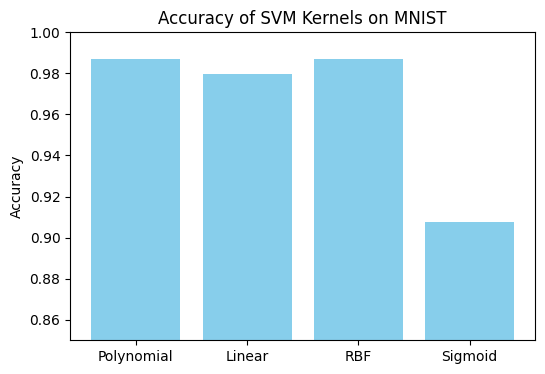

In [ ]:
# Visualization

kernels = ['Polynomial', 'Linear', 'RBF', 'Sigmoid']
accuracy = [poly_acc, lin_acc, rbf_acc, sig_acc]

plt.figure(figsize=(6,4))
plt.bar(kernels, accuracy, color='skyblue')
plt.ylim(0.85, 1.0)
plt.title('Accuracy of SVM Kernels on MNIST')
plt.ylabel('Accuracy')
plt.show()


Observation:

1. Polynomial and RBF kernels achieve the highest accuracy, confirming their effectiveness for non-linear data.

2. Linear kernel performs slightly lower but still well.

3. Sigmoid kernel has the lowest accuracy, indicating it is less suitable for this dataset.

## Conclusion
In the self-learning extension, additional kernels—RBF and Sigmoid—were explored, and all four kernels were compared using a table and bar chart. The results emphasized the strengths of non-linear kernels, particularly RBF, in capturing complex patterns, while the Sigmoid kernel showed comparatively lower performance. This part highlighted the value of experimenting with different kernels and visualizing their outcomes to make informed decisions about model selection. It provided practical insight into the flexibility of SVM and the importance of kernel choice for optimizing classification performance.